In [ ]:
import pandas as pd

solar_wind_path = "solar_wind.csv"
labels_path = "labels.csv"

solar_wind_df = pd.read_csv(solar_wind_path)
labels_df = pd.read_csv(labels_path)

print(solar_wind_df.info())

print(labels_df.info())

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [2]:
len(labels_df)


139872

In [3]:
print(f"Number of samples in solar_wind.csv: {solar_wind_df.shape[0]}")
print(f"Number of samples in labels.csv: {labels_df.shape[0]}")
len(labels_df)


Number of samples in solar_wind.csv: 8392320
Number of samples in labels.csv: 139872


139872

In [4]:
solar_wind_df["timedelta"] = pd.to_timedelta(solar_wind_df["timedelta"])

solar_wind_df["timedelta"] = solar_wind_df["timedelta"].dt.floor("H")

print(solar_wind_df.head(64))
len(labels_df)


     period       timedelta  bx_gse  by_gse  bz_gse  theta_gse  phi_gse  \
0   train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   
1   train_a 0 days 00:00:00   -5.58    3.16    1.17      10.10   151.91   
2   train_a 0 days 00:00:00   -5.15    3.66    0.85       7.87   146.04   
3   train_a 0 days 00:00:00   -5.20    3.68    0.68       6.17   146.17   
4   train_a 0 days 00:00:00   -5.12    3.68    0.49       4.62   145.72   
..      ...             ...     ...     ...     ...        ...      ...   
59  train_a 0 days 00:00:00   -6.52    0.67    1.31      10.90   174.78   
60  train_a 0 days 01:00:00   -6.56    0.27    1.35      11.21   178.22   
61  train_a 0 days 01:00:00   -6.53    0.53    1.42      11.78   175.95   
62  train_a 0 days 01:00:00   -6.47    0.56    1.36      11.41   175.62   
63  train_a 0 days 01:00:00   -6.52    0.39    1.31      10.93   177.14   

    bx_gsm  by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density   speed  \
0    -5.55    3.00    1.25

139872

In [6]:
solar_wind_df["timedelta"] = pd.to_timedelta(solar_wind_df["timedelta"])

numeric_cols = solar_wind_df.select_dtypes(include=['number']).columns

solar_wind_df[numeric_cols] = solar_wind_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

solar_wind_df[numeric_cols] = solar_wind_df.groupby("timedelta")[numeric_cols].transform(lambda x: x.fillna(x.median()))

hourly_avg_df = solar_wind_df.groupby("timedelta")[numeric_cols].mean()

if 'timedelta' not in hourly_avg_df.columns:
    hourly_avg_df = hourly_avg_df.reset_index()

print(hourly_avg_df.head())



SyntaxError: invalid syntax (1530575607.py, line 1)

In [8]:
if 'timedelta' not in hourly_avg_df.columns:
    hourly_avg_df = hourly_avg_df.reset_index()

hourly_avg_df["timedelta"] = pd.to_timedelta(hourly_avg_df["timedelta"])

print(hourly_avg_df.head())
len(labels_df)


                     timedelta    bx_gse    by_gse    bz_gse  theta_gse  \
timedelta                                                                 
0              0 days 00:00:00 -2.926056 -2.133444 -2.176722  -3.211278   
3600000000000  0 days 01:00:00 -3.102278 -3.917667 -5.511389 -19.240389   
7200000000000  0 days 02:00:00 -4.461056 -2.912778 -3.165389 -10.525000   
10800000000000 0 days 03:00:00 -4.831389 -1.055056 -3.897667  -7.848444   
14400000000000 0 days 04:00:00 -3.784667 -0.737500 -3.542056  -4.479444   

                   phi_gse    bx_gsm    by_gsm    bz_gsm  theta_gsm  \
timedelta                                                             
0               206.873000 -2.933389 -1.390444 -2.996278  -7.983833   
3600000000000   223.546167 -3.108444 -2.007556 -6.977278 -27.959389   
7200000000000   207.519389 -4.465500 -1.887333 -4.316833 -17.845667   
10800000000000  195.787444 -4.827667 -0.251167 -4.407500 -11.876222   
14400000000000  203.448389 -3.781333 -0.173833 -

In [9]:
solar_wind_df["timedelta"] = pd.to_timedelta(solar_wind_df["timedelta"], unit="ns")
len(labels_df)


In [10]:
print("solar_wind_df timedelta type:", solar_wind_df["timedelta"].dtype)
len(labels_df)


solar_wind_df timedelta type: timedelta64[ns]


In [11]:
print("Unique hourly timestamps in labels_df:", labels_df["timedelta"].nunique())
print("Total rows in labels_df:", len(labels_df))
len(labels_df)


Unique hourly timestamps in labels_df: 58464
Total rows in labels_df: 139872


VERIFY CLEANED DATASET

In [12]:
print(hourly_avg_df["timedelta"].nunique())  
print(len(hourly_avg_df))  


58464
58464


In [13]:
specific_hour = "0 days 00:00:00"
raw_hour_data = solar_wind_df[solar_wind_df["timedelta"] == pd.to_timedelta(specific_hour)]

print("Raw data for", specific_hour)
print(raw_hour_data)



Raw data for 0 days 00:00:00
          period timedelta  bx_gse  by_gse  bz_gse  theta_gse  phi_gse  \
0        train_a    0 days   -5.55    3.00    1.25      11.09   153.37   
1        train_a    0 days   -5.58    3.16    1.17      10.10   151.91   
2        train_a    0 days   -5.15    3.66    0.85       7.87   146.04   
3        train_a    0 days   -5.20    3.68    0.68       6.17   146.17   
4        train_a    0 days   -5.12    3.68    0.49       4.62   145.72   
...          ...       ...     ...     ...     ...        ...      ...   
4884535  train_c    0 days   -0.22   -9.63    0.45       2.66   268.71   
4884536  train_c    0 days   -0.58   -9.55    0.85       5.09   266.55   
4884537  train_c    0 days   -0.69   -9.55    0.99       5.89   265.85   
4884538  train_c    0 days   -0.96   -9.53    1.06       6.32   264.21   
4884539  train_c    0 days   -0.61   -9.56    0.86       5.16   266.32   

         bx_gsm  by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density   speed  \
0   

DATA CONCATENATION

In [14]:
print(labels_df.columns)


Index(['period', 'timedelta', 'dst'], dtype='object')


In [15]:
labels_df["timedelta"] = pd.to_timedelta(labels_df["timedelta"])

matching_timedeltas = labels_df["timedelta"].isin(hourly_avg_df["timedelta"])

match_percentage = matching_timedeltas.mean() * 100
print(f"Percentage of matching timedelta values: {match_percentage:.2f}%")

non_matching_timedeltas = labels_df.loc[~matching_timedeltas, "timedelta"]
if not non_matching_timedeltas.empty:
    print("Example of non-matching timedelta values:")
    print(non_matching_timedeltas.head(10))
else:
    print("All timedelta values match!")


Percentage of matching timedelta values: 100.00%
All timedelta values match!


In [16]:
if "timedelta" in hourly_avg_df.columns:
    print("hourly_avg_df already contains 'timedelta' as a column.")
else:
    hourly_avg_df = hourly_avg_df.reset_index()

if "timedelta" in labels_df.columns:
    print("labels_df already contains 'timedelta' as a column.")
else:
    labels_df = labels_df.reset_index()


hourly_avg_df already contains 'timedelta' as a column.
labels_df already contains 'timedelta' as a column.


In [17]:
labels_df["timedelta"] = labels_df["timedelta"].dt.floor("H")


In [18]:
print("First few unique timedeltas in hourly_avg_df:")
print(hourly_avg_df["timedelta"].unique()[:10])

print("\nFirst few unique timedeltas in labels_df:")
print(labels_df["timedelta"].unique()[:10])


First few unique timedeltas in hourly_avg_df:
<TimedeltaArray>
['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00', '0 days 03:00:00',
 '0 days 04:00:00', '0 days 05:00:00', '0 days 06:00:00', '0 days 07:00:00',
 '0 days 08:00:00', '0 days 09:00:00']
Length: 10, dtype: timedelta64[ns]

First few unique timedeltas in labels_df:
<TimedeltaArray>
['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00', '0 days 03:00:00',
 '0 days 04:00:00', '0 days 05:00:00', '0 days 06:00:00', '0 days 07:00:00',
 '0 days 08:00:00', '0 days 09:00:00']
Length: 10, dtype: timedelta64[ns]


In [19]:
labels_agg = labels_df.groupby("timedelta", as_index=False)["dst"].mean()
print("After aggregation, labels_df length:", len(labels_agg))
labels_df.size


After aggregation, labels_df length: 58464


In [20]:
print(labels_df.head())
print(labels_df.columns)


    period       timedelta  dst
0  train_a 0 days 00:00:00   -7
1  train_a 0 days 01:00:00  -10
2  train_a 0 days 02:00:00  -10
3  train_a 0 days 03:00:00   -6
4  train_a 0 days 04:00:00   -2
Index(['period', 'timedelta', 'dst'], dtype='object')


In [21]:
hourly_avg_df.to_csv("hourly_avg.csv", index=False)
labels_df.to_csv("labels.csv", index=False)


In [22]:
print(len(hourly_avg_df))


58464


In [11]:
import pandas as pd

df1 = pd.read_csv("labels.csv")  
df2 = pd.read_csv("hourly_avg.csv")

time_col = "timedelta" 

df1_unique = df1.drop_duplicates(subset=[time_col], keep="first")

df2 = df2.merge(df1_unique[[time_col, "dst"]], on=time_col, how="left")

df2.to_csv("hourly_avg_dst.csv", index=False)


In [4]:
dst_df = pd.read_csv('hourly_avg_dst.csv')

dst_df.head()

,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,dst
0,0 days 00:00:00,-2.926056,-2.133444,-2.176722,-3.211278,206.873000,-2.933389,-1.390444,-2.996278,-7.983833,188.540889,12.031944,6.554500,406.231778,59844.472222,-7
1,0 days 01:00:00,-3.102278,-3.917667,-5.511389,-19.240389,223.546167,-3.108444,-2.007556,-6.977278,-27.959389,191.218833,12.378111,5.495611,394.350944,61699.155556,-10
2,0 days 02:00:00,-4.461056,-2.912778,-3.165389,-10.525000,207.519389,-4.465500,-1.887333,-4.316833,-17.845667,194.595333,11.099056,7.644278,398.399389,86511.150000,-10
3,0 days 03:00:00,-4.831389,-1.055056,-3.897667,-7.848444,195.787444,-4.827667,-0.251167,-4.407500,-11.876222,191.322722,12.065778,5.324167,399.055167,85357.388889,-6
4,0 days 04:00:00,-3.784667,-0.737500,-3.542056,-4.479444,203.448389,-3.781333,-0.173833,-4.037889,-9.076444,197.677111,11.785889,6.176667,419.151722,86160.788889,-2


In [ ]:
dst_df_dropped = dst_df.dropna()

print("Shape before dropping:", dst_df.shape)
print("Shape after dropping:", dst_df_dropped.shape)

print("Missing values after dropping:\n", dst_df_dropped.isna().sum())


Shape before dropping: (58464, 16)
Shape after dropping: (58364, 16)
Missing values after dropping:
 timedelta      0
bx_gse         0
by_gse         0
bz_gse         0
theta_gse      0
phi_gse        0
bx_gsm         0
by_gsm         0
bz_gsm         0
theta_gsm      0
phi_gsm        0
bt             0
density        0
speed          0
temperature    0
dst            0
dtype: int64


DATA ANALYSIS

In [10]:
X_train = X_train.drop(columns=['timedelta'])
X_val = X_val.drop(columns=['timedelta'])
X_test = X_test.drop(columns=['timedelta'])



In [16]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: C:\Users\gksan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


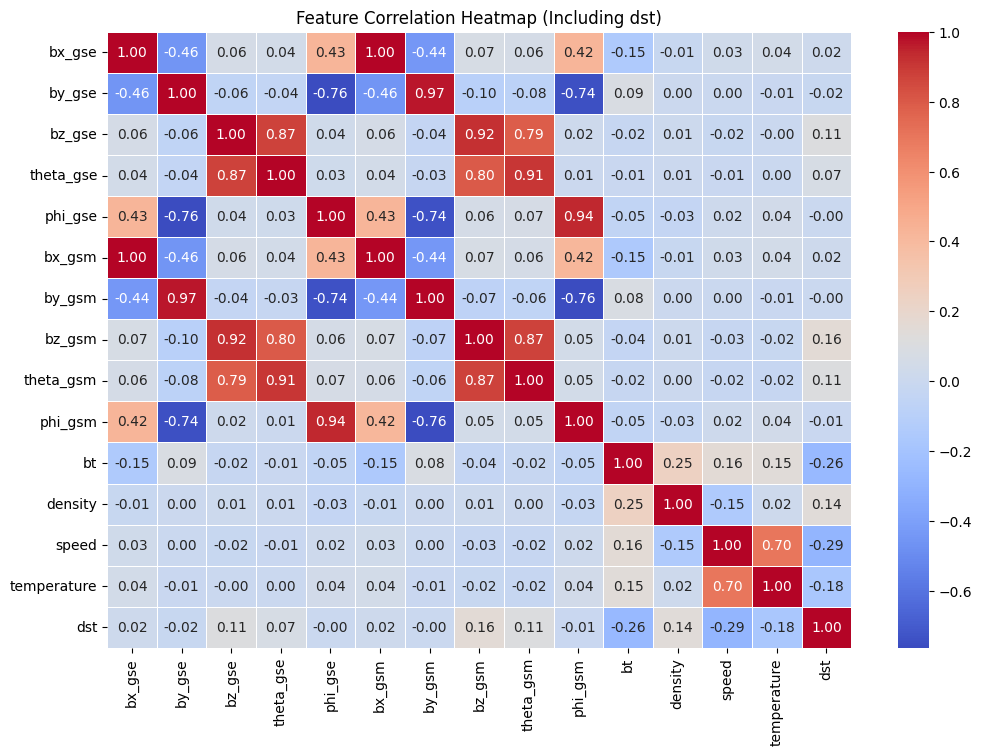

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = dst_df.drop(columns=['timedelta']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap (Including dst)")
plt.show()


In [18]:
corr_matrix = dst_df.drop(columns=['timedelta']).corr()

dst_correlation = corr_matrix["dst"].drop("dst").sort_values(key=abs, ascending=False)

print("Most important features correlated with dst:")
print(dst_correlation)


Most important features correlated with dst:
speed         -0.291421
bt            -0.262011
temperature   -0.175074
bz_gsm         0.156859
density        0.144418
theta_gsm      0.110437
bz_gse         0.108339
theta_gse      0.072329
bx_gsm         0.020602
bx_gse         0.020573
by_gse        -0.018333
phi_gsm       -0.008797
phi_gse       -0.004203
by_gsm        -0.000611
Name: dst, dtype: float64


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

X = dst_df_dropped.drop(columns=['timedelta', 'dst'])
y = dst_df_dropped['dst']

X_standardized = (X - X.mean()) / X.std()

pca = PCA(n_components=X.shape[1])  
X_pca = pca.fit_transform(X_standardized)

explained_variance = pca.explained_variance_ratio_

print("Explained variance ratio per component:\n", explained_variance)

important_features = np.abs(pca.components_).argmax(axis=1)
print("\nMost influential features in each principal component:")
for i, feature_index in enumerate(important_features):
    print(f"PC{i+1}: {X.columns[feature_index]}")


Explained variance ratio per component:
 [3.05478177e-01 2.49284245e-01 1.25673801e-01 9.68593553e-02
 8.44085279e-02 5.02869240e-02 3.20642977e-02 1.98455478e-02
 1.77391987e-02 1.14298944e-02 4.81415418e-03 1.40443454e-03
 7.11356541e-04 8.57259864e-08]

Most influential features in each principal component:
PC1: by_gse
PC2: theta_gse
PC3: speed
PC4: bx_gsm
PC5: density
PC6: bt
PC7: by_gsm
PC8: speed
PC9: bz_gse
PC10: theta_gse
PC11: phi_gsm
PC12: by_gse
PC13: bz_gsm
PC14: bx_gse


RANDOM FOREST REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

selected_features = ['speed', 'bt', 'temperature', 'bz_gsm', 'density', 'dst']
dst_df_filtered = dst_df_dropped[selected_features]

X = dst_df_filtered.drop(columns=['dst'])  # Features
y = dst_df_filtered['dst']  # Target


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_val_pred = rf_regressor.predict(X_val)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

y_test_pred = rf_regressor.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R²: {test_r2:.4f}")


Training set: (37352, 5), (37352,)
Validation set: (9339, 5), (9339,)
Testing set: (11673, 5), (11673,)
Validation MSE: 346.7179
Validation R²: 0.2817
Test MSE: 309.6371
Test R²: 0.2700


In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_regressor.fit(X_train, y_train)

y_val_pred = xgb_regressor.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"XGBoost Validation MSE: {val_mse:.4f}")
print(f"XGBoost Validation R²: {val_r2:.4f}")

y_test_pred = xgb_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"XGBoost Test MSE: {test_mse:.4f}")
print(f"XGBoost Test R²: {test_r2:.4f}")


XGBoost Validation MSE: 353.2857
XGBoost Validation R²: 0.2681
XGBoost Test MSE: 325.8235
XGBoost Test R²: 0.2319


In [ ]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf', C=100, gamma=0.1)

svr_regressor.fit(X_train, y_train)

y_val_pred = svr_regressor.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"SVR Validation MSE: {val_mse:.4f}")
print(f"SVR Validation R²: {val_r2:.4f}")

y_test_pred = svr_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"SVR Test MSE: {test_mse:.4f}")
print(f"SVR Test R²: {test_r2:.4f}")


SVR Validation MSE: 482.9303
SVR Validation R²: -0.0005
SVR Test MSE: 424.5081
SVR Test R²: -0.0008


In [33]:
from sklearn.linear_model import Ridge
    
ridge_regressor = Ridge(alpha=1.0)

ridge_regressor.fit(X_train, y_train)

y_val_pred = ridge_regressor.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Ridge Validation MSE: {val_mse:.4f}")
print(f"Ridge Validation R²: {val_r2:.4f}")

y_test_pred = ridge_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Ridge Test MSE: {test_mse:.4f}")
print(f"Ridge Test R²: {test_r2:.4f}")


Ridge Validation MSE: 394.1239
Ridge Validation R²: 0.1835
Ridge Test MSE: 349.7102
Ridge Test R²: 0.1756


In [34]:
importances = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


       Feature  Importance
0        speed    0.251500
1           bt    0.212449
3       bz_gsm    0.183544
4      density    0.177931
2  temperature    0.174577


In [36]:
import joblib

joblib.dump(rf_regressor, "geomagnetic_model.pkl")
print("Model saved as geomagnetic_model.pkl")


Model saved as geomagnetic_model.pkl


In [37]:
import joblib
import numpy as np

model = joblib.load("geomagnetic_model.pkl")

new_data = np.array([[350, 6.2, 50000, -2.5, 5.1]])  

.rediction = model.predict(new_data)

print("Predicted Dst value:", prediction[0])


Predicted Dst value: -7.73


C:\Users\gksan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
